<a href="https://colab.research.google.com/github/samndambuki/ML-Foundations/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#plotting images and loss function
import matplotlib.pyplot as plt
#import dataset 
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
#download
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()
#nrormalize
train_images, test_images = train_images / 255.0, test_images/255.0


170498071/170498071 [==============================] - 2s 0us/step


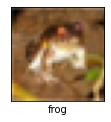

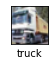

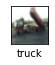

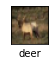

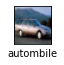

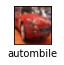

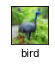

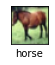

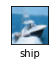

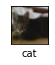

In [4]:
#define classes
class_names = ['airplane', 'autombile','bird','cat','deer','dog','frog','horse','ship','truck']

#show
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [8]:
#build cnn
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

                         

In [9]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [12]:
#Compilation and training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images,test_labels))


Epoch 1/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5580 - accuracy: 0.8038 - val_loss: 0.8783 - val_accuracy: 0.7101
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5241 - accuracy: 0.8166 - val_loss: 0.9076 - val_accuracy: 0.7044
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4922 - accuracy: 0.8269 - val_loss: 0.9448 - val_accuracy: 0.7039
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4599 - accuracy: 0.8389 - val_loss: 0.9561 - val_accuracy: 0.7148
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4309 - accuracy: 0.8463 - val_loss: 1.0381 - val_accuracy: 0.7021
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4062 - accuracy: 0.8560 - val_loss: 1.0167 - val_accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.3794 - accuracy: 0.8650 - val_loss: 1.0304 -

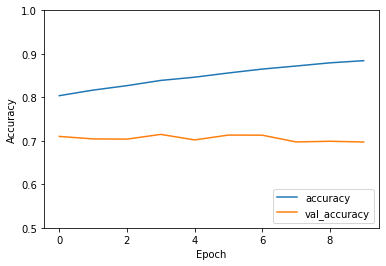

In [13]:
#Evaluate Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')